## Dogs vs Cats image classification (without image augmentation)

### Importing packages

In [87]:
from __future__ import absolute_import, division, print_function

import numpy as np
import os
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

### Data loading

In [88]:
dir_name = os.path.dirname("/home/login/Documents/Machine_learning/Datasets/cats_and_dogs_filtered/")
print(os.listdir(dir_name))
!find $dir_name -type d -print

['validation', 'train', 'vectorize.py']
/home/login/Documents/Machine_learning/Datasets/cats_and_dogs_filtered
/home/login/Documents/Machine_learning/Datasets/cats_and_dogs_filtered/validation
/home/login/Documents/Machine_learning/Datasets/cats_and_dogs_filtered/validation/dogs
/home/login/Documents/Machine_learning/Datasets/cats_and_dogs_filtered/validation/cats
/home/login/Documents/Machine_learning/Datasets/cats_and_dogs_filtered/train
/home/login/Documents/Machine_learning/Datasets/cats_and_dogs_filtered/train/dogs
/home/login/Documents/Machine_learning/Datasets/cats_and_dogs_filtered/train/cats


In [89]:
train_dir = os.path.join(dir_name, "train")
val_dir = os.path.join(dir_name, "validation")

train_dogs_dir = os.path.join(train_dir, "dogs")
train_cats_dir = os.path.join(train_dir, "cats")
val_cats_dir = os.path.join(val_dir, "cats")
val_dogs_dir = os.path.join(val_dir, "dogs")
val_dogs_dir

'/home/login/Documents/Machine_learning/Datasets/cats_and_dogs_filtered/validation/dogs'

### Understanding the data

In [90]:
num_cats_train = len(os.listdir(train_cats_dir))
num_dogs_train = len(os.listdir(train_dogs_dir))

num_cats_val = len(os.listdir(val_cats_dir))
num_dogs_val = len(os.listdir(val_dogs_dir))

num_train = num_cats_train + num_dogs_train
num_val = num_cats_val + num_dogs_val

In [91]:
print(f"Total number of train data: {num_train}")
print(f"Total number of validation data: {num_val}")
print("---" * 15)
print(f"Total number of dogs train data: {num_dogs_train}")
print(f"Total number of cats train data: {num_cats_train}")
print("---" * 15)
print(f"Total number of dogs validation data: {num_dogs_val}")
print(f"Total number of cats validation data: {num_cats_val}")

Total number of train data: 2000
Total number of validation data: 1000
---------------------------------------------
Total number of dogs train data: 1000
Total number of cats train data: 1000
---------------------------------------------
Total number of dogs validation data: 500
Total number of cats validation data: 500


### Setting model parameters

In [92]:
BATCH_SIZE = 100
IMG_SHAPE = 150

### Data Preparation

In [93]:
train_img_gen = ImageDataGenerator(rescale=1./255)
val_img_gen = ImageDataGenerator(rescale=1./255)
train_img_gen

In [94]:
train_data_gen = train_img_gen.flow_from_directory(batch_size=BATCH_SIZE,
                                                  directory=train_dir,
                                                  shuffle=True,
                                                  target_size=(IMG_SHAPE, IMG_SHAPE),
                                                  class_mode='binary')

val_data_gen = val_img_gen.flow_from_directory(batch_size = BATCH_SIZE,
                                              directory = val_dir,
                                              shuffle = True,
                                              target_size = (IMG_SHAPE, IMG_SHAPE),
                                              class_mode = 'binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


### Visualizing the Images

In [95]:
sample_images = next(train_data_gen)
sample_images[0][0].shape

(150, 150, 3)

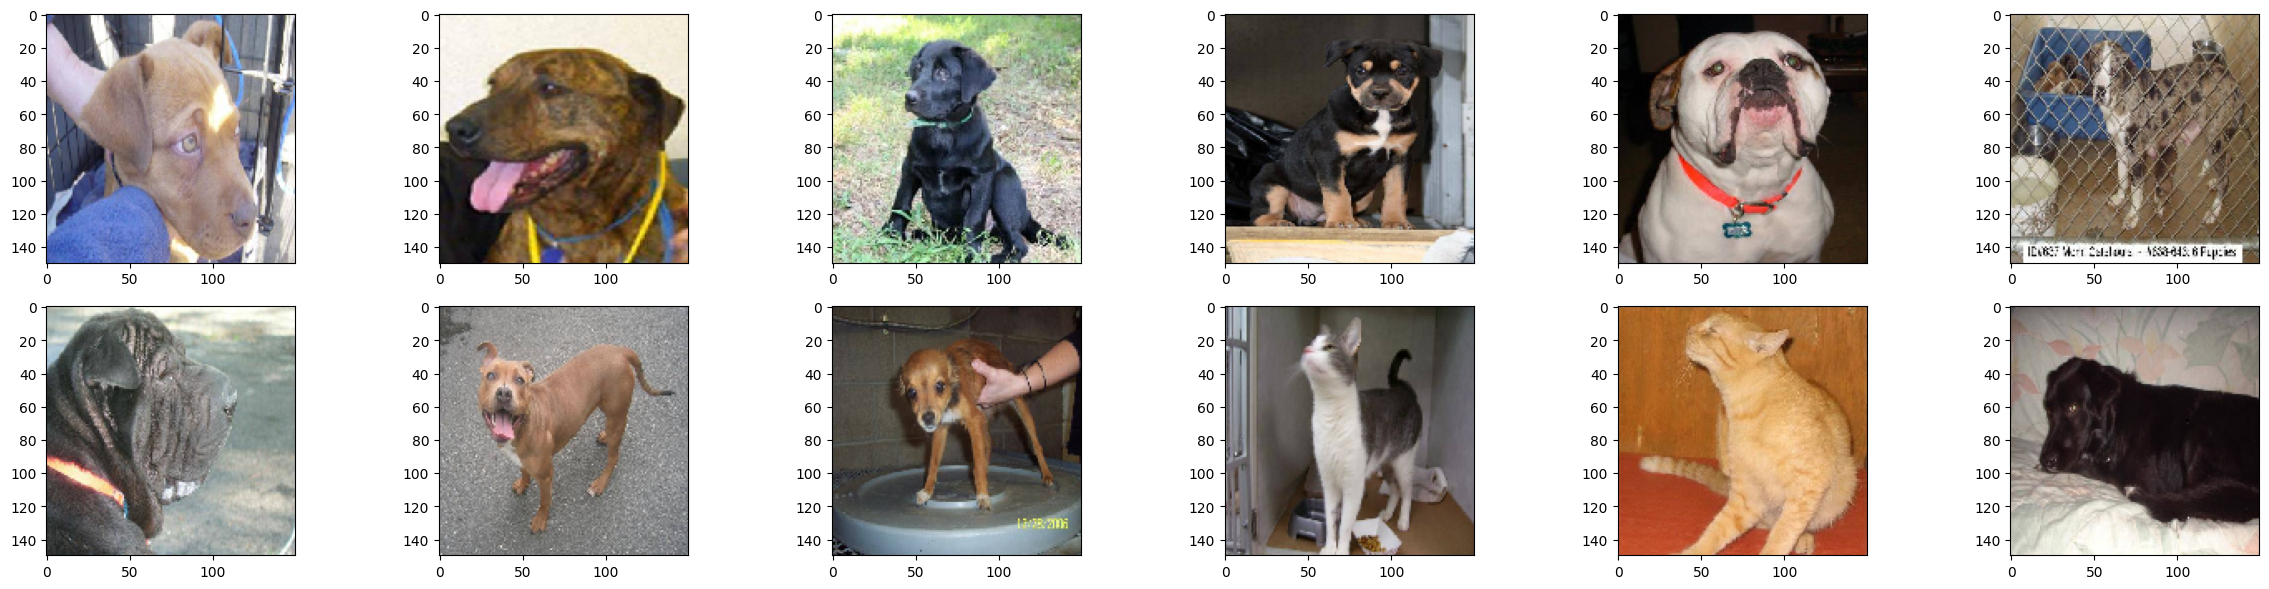

In [96]:
def plot_images(images):
    fig, axes = plt.subplots(2, 6, figsize = (24, 6))
    
    axes = axes.flatten()
    for img, ax in zip(images, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()
plot_images(sample_images[0][:13])

### Model Creation
#### Define the model

In [97]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)))
model.add(tf.keras.layers.MaxPooling2D(2, 2))

model.add(tf.keras.layers.Conv2D(64, (3,3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(2, 2))

model.add(tf.keras.layers.Conv2D(128, (3,3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(2, 2))

model.add(tf.keras.layers.Conv2D(128, (3, 3), activation = 'relu'))
model.add(tf.keras.layers.MaxPooling2D(2, 2))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(512, activation = 'relu'))
model.add(tf.keras.layers.Dense(2, activation = 'softmax'))

### Compile the model

In [98]:
model.compile(loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'],
             optimizer = 'adam')

### Model Summary

In [99]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 74, 74, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 17, 17, 128)      

### Train the model

In [100]:
EPOCHS = 40

history = model.fit_generator(train_data_gen,
                             steps_per_epoch = int(np.ceil(num_train/float(BATCH_SIZE))),
                             epochs = EPOCHS,
                             validation_data = val_data_gen,
                             validation_steps = int(np.ceil(num_val/float(BATCH_SIZE)))
                             )

/tmp/ipykernel_3094/733552669.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_data_gen,


Epoch 1/40
20/20 [==============================] - 133s 6s/step - loss: 0.7621 - accuracy: 0.5110 - val_loss: 0.6924 - val_accuracy: 0.5000
Epoch 2/40
20/20 [==============================] - 78s 4s/step - loss: 0.6934 - accuracy: 0.5060 - val_loss: 0.6917 - val_accuracy: 0.5110
Epoch 3/40
20/20 [==============================] - 77s 4s/step - loss: 0.6874 - accuracy: 0.5560 - val_loss: 0.6875 - val_accuracy: 0.5250
Epoch 4/40
20/20 [==============================] - 81s 4s/step - loss: 0.6754 - accuracy: 0.5935 - val_loss: 0.6686 - val_accuracy: 0.6180
Epoch 5/40
20/20 [==============================] - 75s 4s/step - loss: 0.6321 - accuracy: 0.6425 - val_loss: 0.6521 - val_accuracy: 0.6120
Epoch 6/40
20/20 [==============================] - 76s 4s/step - loss: 0.6242 - accuracy: 0.6605 - val_loss: 0.6281 - val_accuracy: 0.6520
Epoch 7/40
20/20 [==============================] - 76s 4s/step - loss: 0.5770 - accuracy: 0.7050 - val_loss: 0.6132 - val_accuracy: 0.6630
Epoch 8/40
20/20 [=

### Visualize our results

In [101]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

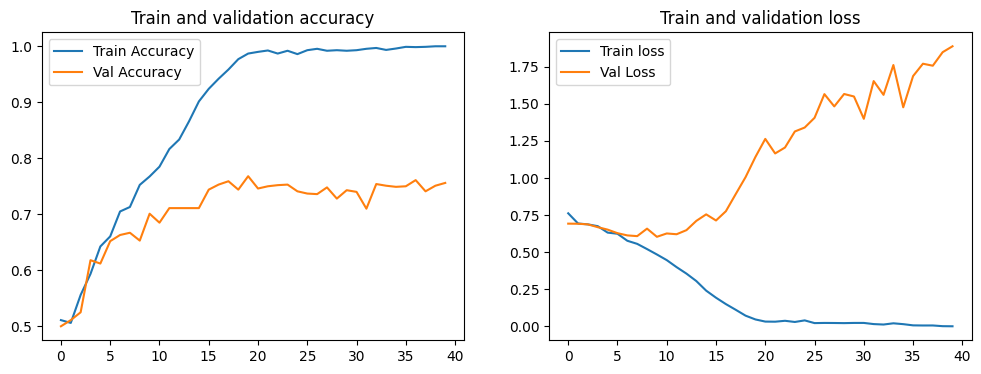

In [104]:
plt.figure(figsize = (12, 4))

epochs_range = range(EPOCHS)

plt.subplot(1, 2, 1)
plt.plot(epochs_range, accuracy, label = "Train Accuracy");
plt.plot(epochs_range, val_accuracy, label = "Val Accuracy");
plt.title("Train and validation accuracy");
# plt.xticks(epochs_range);
plt.legend();

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label = "Train loss");
plt.plot(epochs_range, val_loss, label = "Val Loss");
plt.title("Train and validation loss");
# plt.xticks(epochs_range, rotation = 90);
plt.legend();